# <center>Programming in Python</center>
# <center>Zadanie 1</center>
# <center>Hubert Kłosowski 242424</center>
# <center>Kamil Małecki 242464</center>

### Statistical analysis of the snails called abalones.
### Information about the dataset:
### Attributes (columns):
### 1. sex - categorical:
###    M - male
###    F - female
###    I - infant
### 2. length [mm] - continuous
### 3. diameter [mm] - continuous
### 4. height [mm] - continuous
### 5. whole weight [g] - continuous
### 6. shucked weight [g] (weight of meat) - continuous
### 7. viscera weight [g] (gut weight after bleeding) - continuous
### 8. shell weight [g] (after being dried) - continuous
### 9. rings - integer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset, and preparing it for analysis
data = pd.read_csv("data/data.csv", sep=',', header=None)
unit_colnames = ['Sex', 'Length [mm]', 'Diameter [mm]', 'Height [mm]', 'Whole weight [g]', 'Shucked weight [g]',
                 'Viscera weight [g]', 'Shell weight [g]', 'Rings']
no_unit_colnames = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight',
                    'Shell weight', 'Rings']
data.columns = no_unit_colnames

### 1. Table of the distribution of the qualitative variable in the dataset.

In [3]:
def qualitative_characteristics():
    v1 = data['Sex'].value_counts().values
    percentages = [round(l / v1.sum() * 100, 2) for l in v1]
    return [v1, percentages]

table1 = pd.DataFrame(qualitative_characteristics(), columns=["Male", "Infant", "Female"], index=["count", "%"])
display(table1.T)

,count,%
Male,1528.0,36.58
Infant,1342.0,32.13
Female,1307.0,31.29


### 2. Table with summary statistics for the quantitative variables in the dataset.


In [4]:
def quantitative_characteristics():
    result = data.describe().drop('count').T
    return result

table2 = pd.DataFrame(quantitative_characteristics(), columns=["mean", "std", "min", "25%", "50%", "75%", "max"])
display(table2)

,mean,std,min,25%,50%,75%,max
Length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


### 3. Counts of occurrences of each category for the qualitative variable in the dataset.


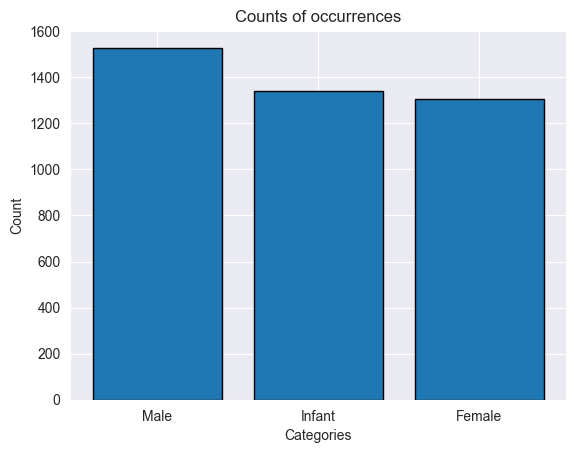

In [5]:
qualitative = qualitative_characteristics()
categories = ['Male', 'Infant', 'Female']
plt.bar(categories, qualitative[0], edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Categories')
plt.title('Counts of occurrences')
plt.show()

### 4. Histogram of each quantitative variable in the dataset.

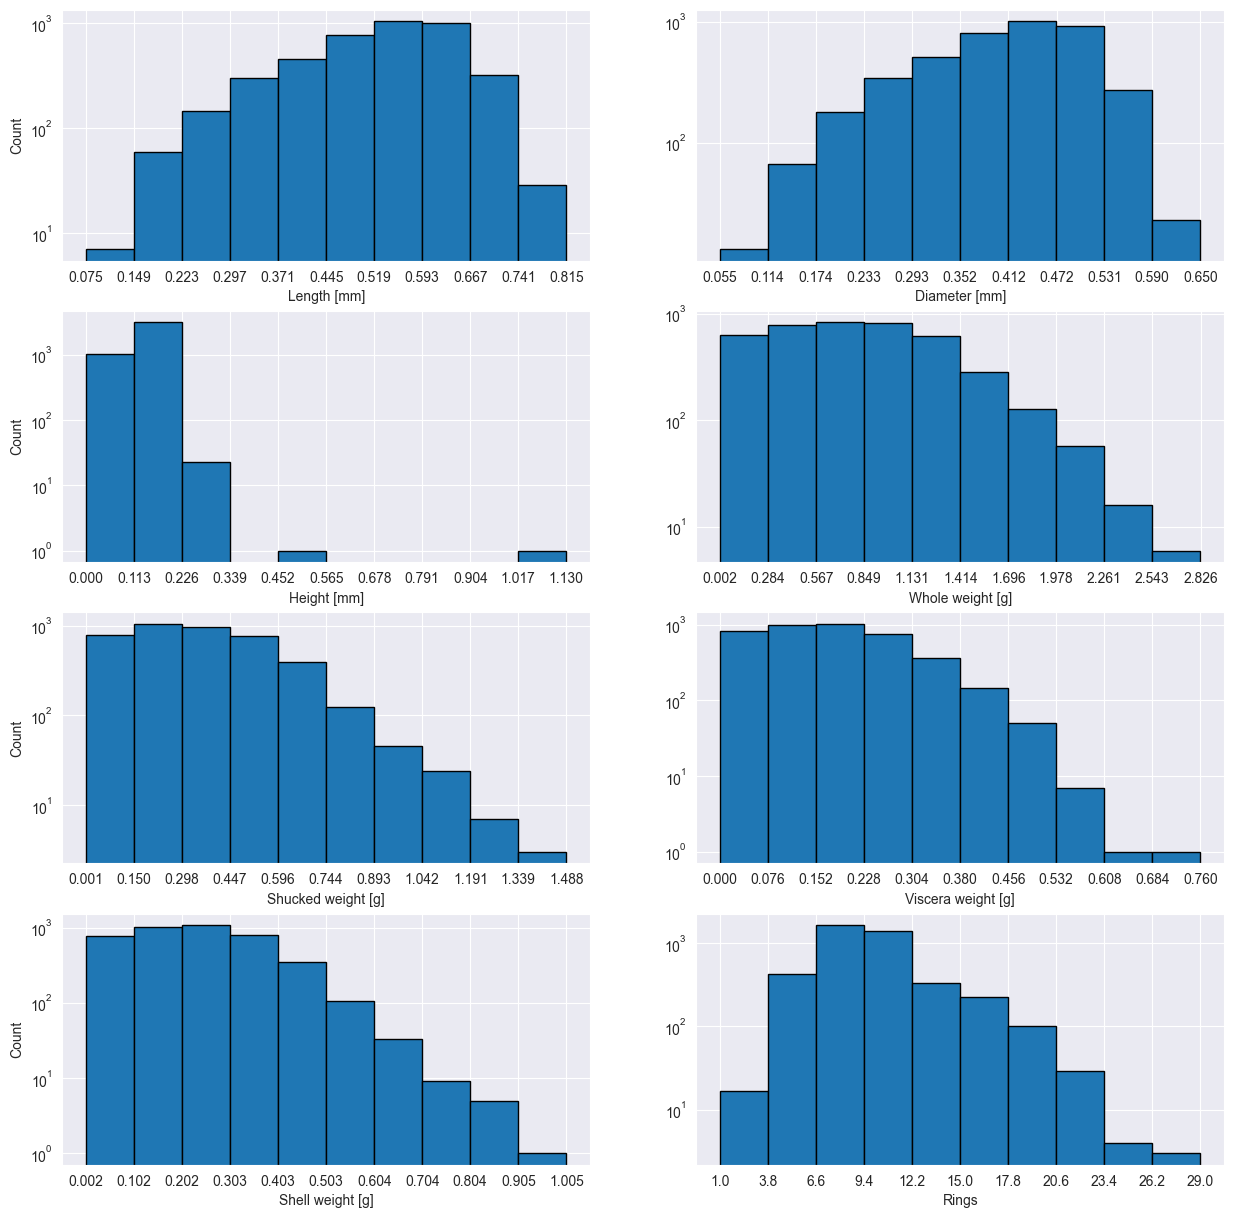

In [6]:
def adjust_for_histrogram(column_data, bins):
    mininum = column_data.min()
    maximum = column_data.max()
    bin_size = (maximum - mininum) / bins
    return [mininum, maximum, bin_size]

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
j = 0
for i in range(1, len(data.columns)):
    axs[j, (i - 1) % 2].hist(data.iloc[:, i], bins=10, edgecolor='black', log=True)
    axs[j, (i - 1) % 2].set_xlabel(unit_colnames[i])
    arr = adjust_for_histrogram(data.iloc[:, i], 10)
    axs[j, (i - 1) % 2].set_xticks([round(arr[0] + arr[2] * i, 3) for i in range(11)])
    if i % 2 != 0:
        axs[j, (i - 1) % 2].set_ylabel('Count')
    j += (i - 1) % 2
plt.show()

### 5. Scatter plot for each pair of the quantitative variables in the dataset.

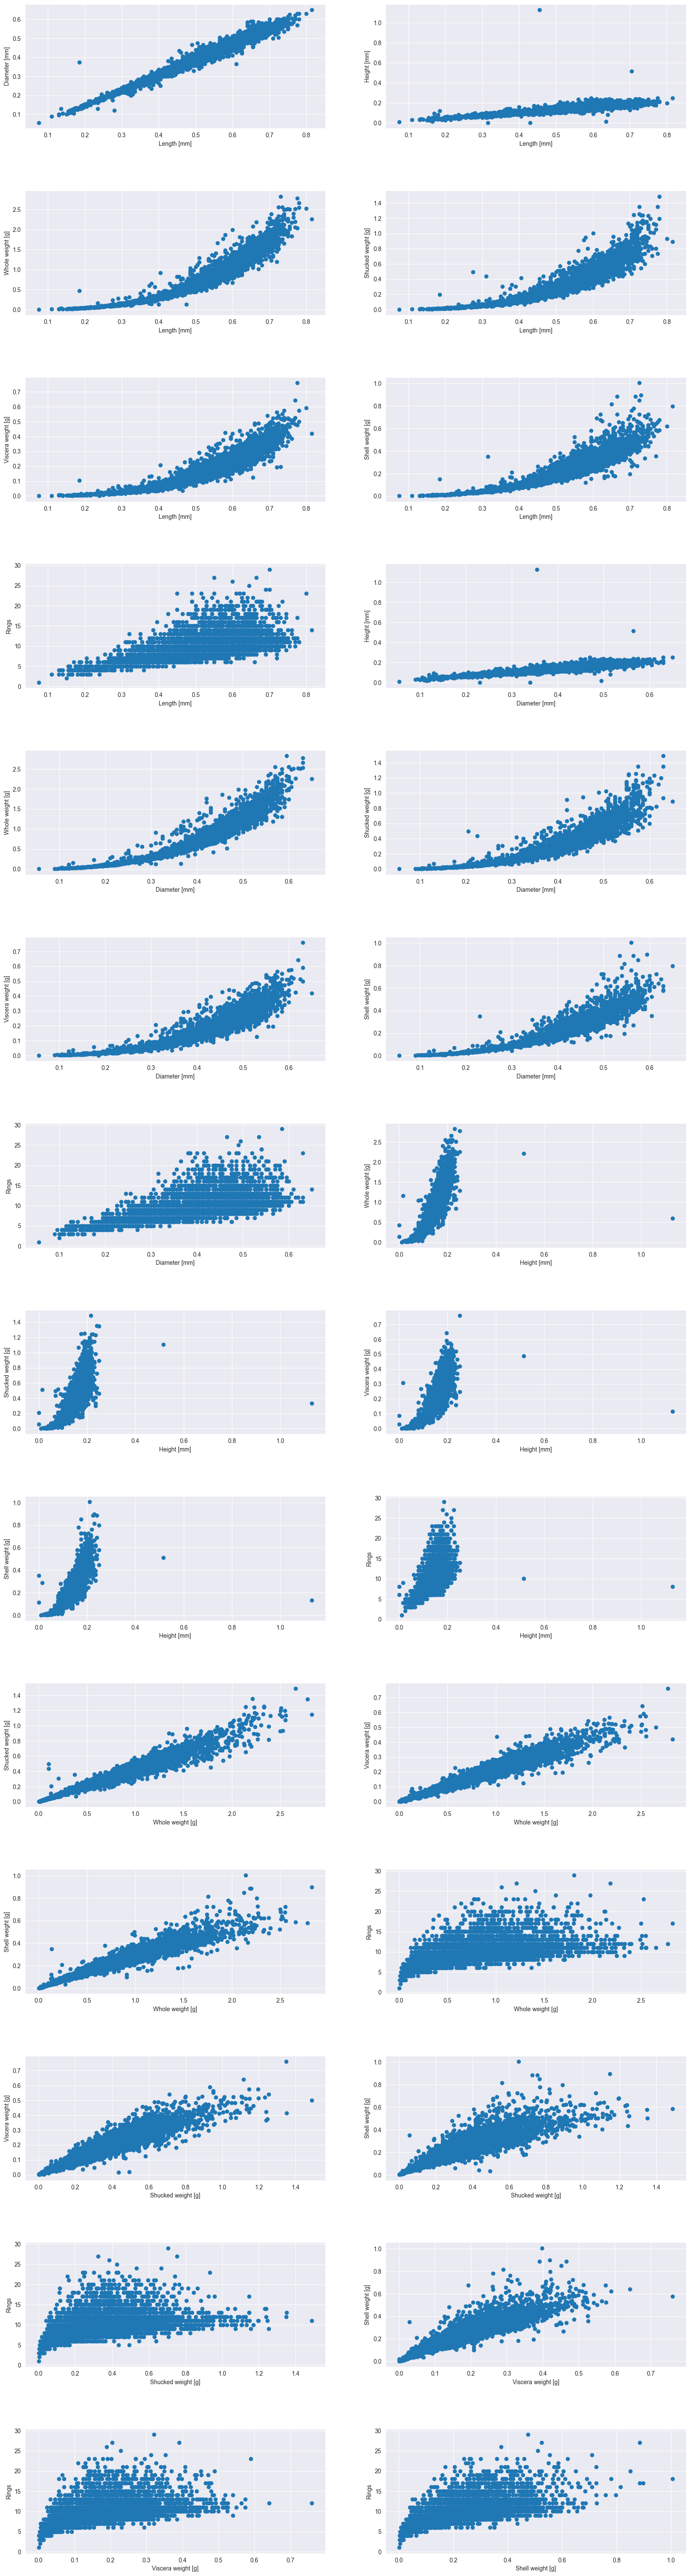

In [7]:
fig, axs = plt.subplots(14, 2, figsize=(20, 65))
plt.subplots_adjust(top=0.97, bottom=0.05, hspace=0.5, wspace=0.2)
k, x = 0, 0
for i in range(1, len(data.columns)):
    for j in range(i + 1, len(data.columns)):
        axs[x, k % 2].scatter(data.iloc[:, i], data.iloc[:, j])
        axs[x, k % 2].set_xlabel(unit_colnames[i])
        axs[x, k % 2].set_ylabel(unit_colnames[j])
        k += 1
        if k % 2 == 0:
            x += 1
plt.show()

### 6. Table representing a linear correlation matrix of all quantitative variables in the dataset.

In [8]:
data.iloc[:, 1:].corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


### 7. Heatmap representing a linear correlation matrix of all quantitative variables in the dataset.

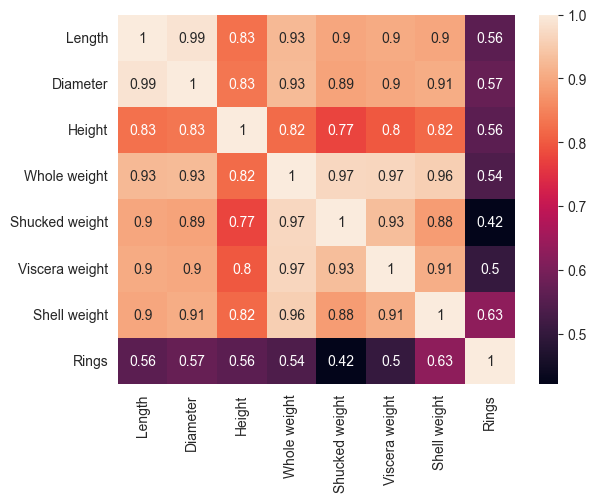

In [9]:
sns.heatmap(data.iloc[:, 1:].corr(), annot=True)
plt.show()

### 8. Linear regression plot with the two quantitative variables that are most strongly linearly correlated.

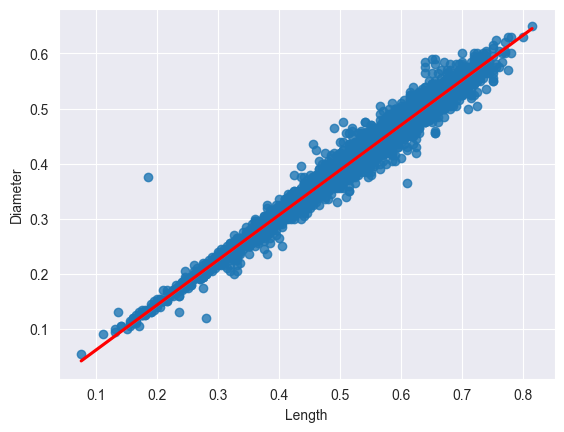

In [10]:
sns.regplot(x=data['Length'], y=data['Diameter'], line_kws={"color": "red"})
plt.show()

### 9. Table with summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable.

In [11]:
tmp = ['F', 'I', 'M']
col1 = ['Female', 'Infant', 'Male']
final = []
for i, column in enumerate(data.columns[1:]):
    col0 = [no_unit_colnames[i + 1], '', '']
    for o, el in enumerate(tmp):
        stats = data[data['Sex'] == el][column].describe().drop('count').values
        stats = stats.tolist()
        stats.insert(0, col1[o])
        stats.insert(0, col0[o])
        final.append(stats)

table3 = pd.DataFrame(final, columns=["Feature", "Sex", "mean", "std", "min", "25%", "50%", "75%", "max"])
display(table3.set_index('Feature'))

,Sex,mean,std,min,25%,50%,75%,max
Feature,,,,,,,,
Length,Female,0.579093,0.086160,0.2750,0.525000,0.59000,0.640000,0.8150
,Infant,0.427746,0.108858,0.0750,0.360000,0.43500,0.510000,0.7250
,Male,0.561391,0.102697,0.1550,0.505000,0.58000,0.630000,0.7800
Diameter,Female,0.454732,0.070954,0.1950,0.410000,0.46500,0.505000,0.6500
,Infant,0.326494,0.088109,0.0550,0.270000,0.33500,0.390000,0.5500
,Male,0.439287,0.084398,0.1100,0.395000,0.45500,0.500000,0.6300
Height,Female,0.158011,0.039984,0.0150,0.140000,0.16000,0.175000,1.1300
,Infant,0.107996,0.031995,0.0000,0.085000,0.11000,0.130000,0.2200
,Male,0.151381,0.034804,0.0250,0.130000,0.15500,0.175000,0.5150


### 10. Box plot for each quantitative variable in the dataset split by the categories of the qualitative variable.

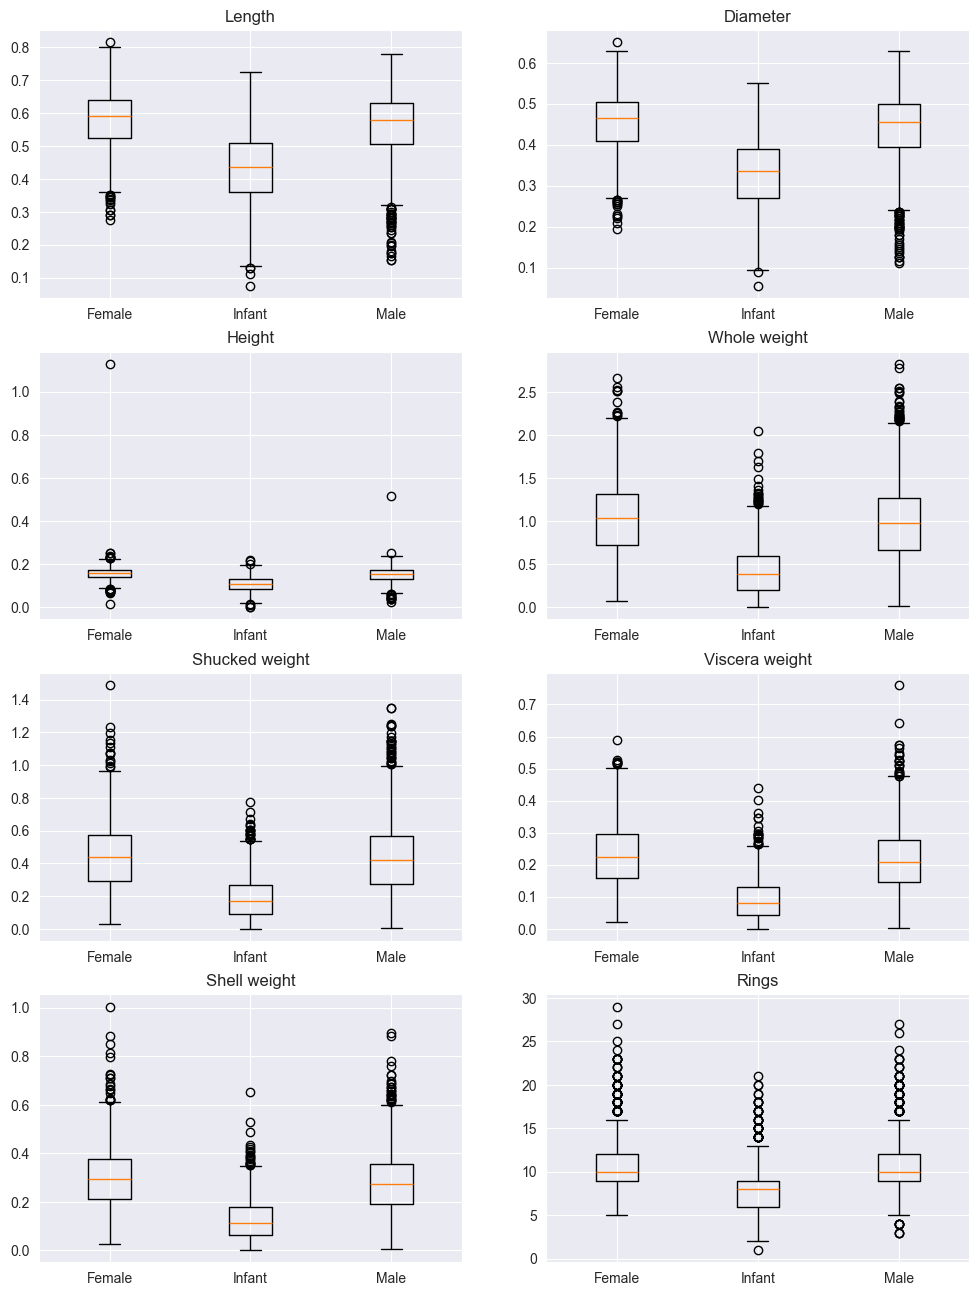

In [12]:
def group_data(colname, sex):
    result = []
    for element in sex:
        result.append(data[data['Sex'] == element][colname])
    return result

titles = ['Female', 'Infant', 'Male']
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
for i, col in enumerate(data.columns[1:]):
    axs[int(i / 2), i % 2].boxplot(group_data(col, ['F', 'I', 'M']), labels=titles)
    axs[int(i / 2), i % 2].set_title(col)
plt.show()